In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# encontremos la recta que une los tres puntos del ejercicio en clase:
x = np.array([0,1,2])
y = np.array([0,1,0]).T
X = np.stack((np.ones(3),x)).T
print('X:',X)

betahat = np.linalg.inv(X.T @ X) @ X.T @ y
print('betahat:',betahat)

X: [[1. 0.]
 [1. 1.]
 [1. 2.]]
betahat: [0.33333333 0.        ]



Vamos a suponer que hay un fenómeno lineal que está generando mis puntos.
 Partimos de la base de que conocemos el proceso que genera los puntos pero que
 una vez que los puntos fueron generados queremos recuperar los parametros como si
 no los hubieramos conocido desde un principio.



In [13]:
# trabajamos en la situación k = 1 
nsamples = 100
x = np.random.randn(nsamples)
X = np.stack((np.ones(nsamples),x)).T

beta = np.array([.5,3]).T
z = np.random.randn(nsamples)
y = X @ beta + z


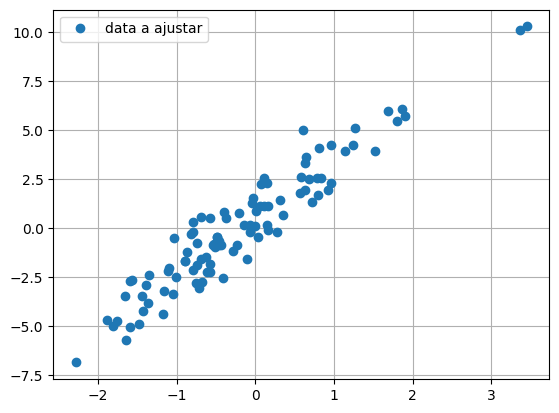

In [15]:
plt.plot(x,y,'o',label='data a ajustar')
plt.grid()
plt.legend();

betahat: [0.56930439 2.86332542]


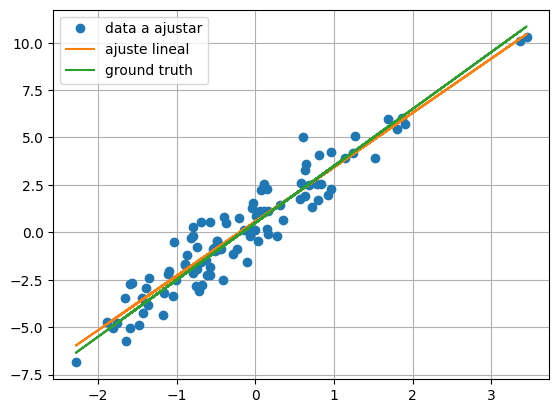

In [20]:

betahat = np.linalg.inv(X.T @ X) @ X.T @ y
print('betahat:',betahat)
plt.plot(x,y,'o',label='data a ajustar')
plt.plot(x,X@betahat,label='ajuste lineal')
plt.plot(x,X@beta,label='ground truth')
plt.grid()
plt.legend();

In [105]:
#  vamos a hacer una simulación para ver como se comporta betahat
nsamples = 100
beta = np.array([.5,3]).T
iterations = 100_000
betahats = np.zeros([iterations,2])

for _ in range(iterations):
    x = np.random.randn(nsamples)
    X = np.stack((np.ones(nsamples),x)).T
    
    z = np.random.randn(nsamples)
    y = X @ beta + z
    betahat = np.linalg.inv(X.T @ X) @ X.T @ y
    betahats[_] = betahat

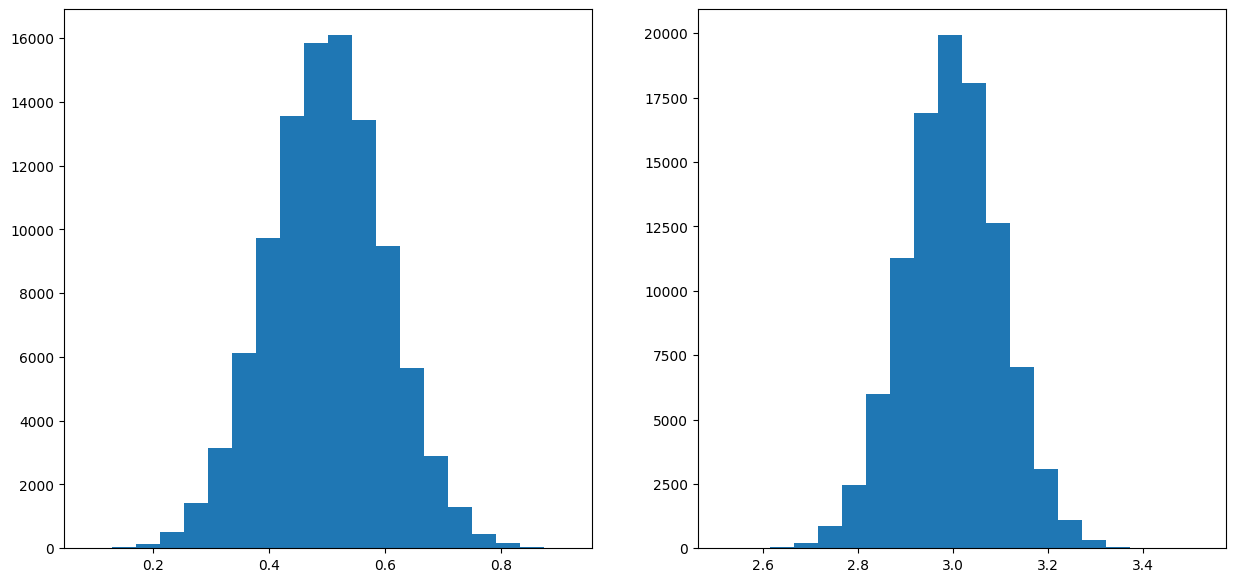

In [106]:
_, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].hist(betahats[:,0],bins = 20)

ax[1].hist(betahats[:,1],bins = 20);

In [111]:
betahats.mean(axis = 0) # el estimador betahat es insesgado, o al menos asisntoticamente!

array([0.49964087, 3.00000618])

In [113]:
# que podemos decir de la varianza?
betahats.var(axis = 0)
# me gustaria poder entender esto
# conjetura : la varianza de los betas no depende de que beta agarro y encima
# var(betahat0) = var(Z)/nsamples # no depende de las iteraciones 

array([0.01014699, 0.01030479])

In [131]:
def compute_betas_var(nsamples = 100, iterations = 10_000,noise= 1):
    beta = np.array([.5,3]).T
    betahats = np.zeros([iterations,2])
    
    for _ in range(iterations):
        x = np.random.randn(nsamples)
        X = np.stack((np.ones(nsamples),x)).T
        
        z = np.random.randn(nsamples)*noise
        y = X @ beta + z
        betahat = np.linalg.inv(X.T @ X) @ X.T @ y
        betahats[_] = betahat
    return betahats.var(axis = 0)


In [133]:
noise_range = np.linspace(.1,3.9,20)
vars = np.zeros([20,2])

for i, noise in enumerate(noise_range):
    vars[i,:] = compute_betas_var(noise = noise)
    

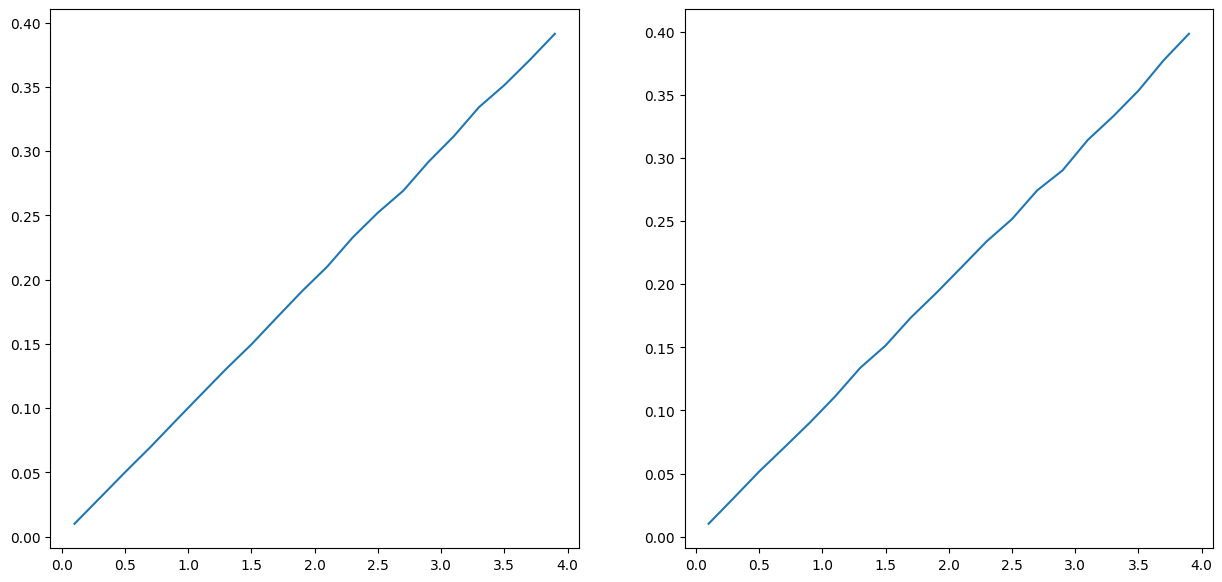

In [137]:
_, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(noise_range,vars[:,0]**(1/2))
ax[1].plot(noise_range,vars[:,1]**(1/2))


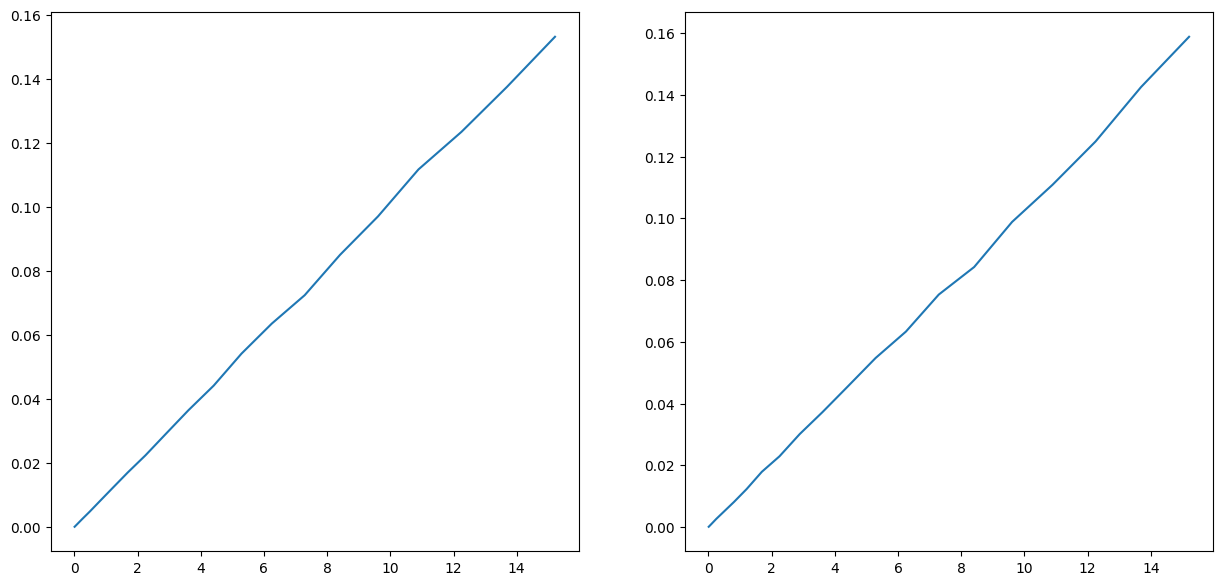

In [138]:
_, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(noise_range**2,vars[:,0] )
ax[1].plot(noise_range**2,vars[:,1])
